<div style="float:center;"><h2>GROUP:9</h2></div>

## Group members:
* Mikhaël Presley KIBINDA-MOUKENGUE
* Nazir ZUBERU
* Nokeme MEITE
* Yvan TAMDJO BIAKEU

In [83]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd


## Loading Data

In [96]:
# Création des colonnes
column = ['a'+str(i) for i in range(216)]
data = pd.read_fwf('mfeat-fac', delimiter=' ', names=column)

letter = ['b','c','d','e','f']
file = ['mfeat-fou','mfeat-kar','mfeat-zer','mfeat-pix','mfeat-mor']
rank = [76,64,47,240,6]
j=0
for l in letter:
    column = [l+str(i) for i in range(rank[j])]
    data1 = pd.read_fwf(file[j], delimiter=' ', names=column)
    data = pd.concat([data,data1], axis=1)
    j = j+1
data

,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,e236,e237,e238,e239,f0,f1,f2,f3,f4,f5
0,98,236,531,673,607,647,2,9,3,6,...,0,0,0,0,1.0,0.0,0.0,133.150861,1.311693,1620.221779
1,121,193,607,611,585,665,7,9,2,4,...,0,0,0,0,1.0,0.0,0.0,126.724861,1.302745,1609.334822
2,115,141,590,605,557,627,12,6,3,3,...,4,2,1,0,1.0,0.0,0.0,131.173861,1.319031,1568.978435
3,90,122,627,692,607,642,0,6,4,5,...,0,0,0,0,1.0,0.0,0.0,129.478861,1.270878,1695.055281
4,157,167,681,666,587,666,8,6,1,4,...,0,0,0,0,1.0,0.0,0.0,127.262861,1.329637,1647.720235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,304,242,927,626,564,674,25,17,0,7,...,4,0,0,0,1.0,1.0,1.0,157.498861,1.655794,5326.025889
1996,324,330,919,713,609,693,28,16,8,9,...,0,0,0,0,1.0,1.0,1.0,152.404861,1.620345,5243.267754
1997,337,299,852,724,581,660,22,14,10,10,...,0,0,0,0,1.0,1.0,1.0,134.672861,1.541987,3766.763222
1998,247,261,866,633,565,615,24,15,2,4,...,0,0,0,0,1.0,1.0,1.0,142.926861,1.426381,4118.327320


## exploratory analysis

## Describe

In [97]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
a0,2000.0,272.051500,91.275454,67.000000,208.000000,274.500000,338.000000,515.000000
a1,2000.0,322.725500,109.426588,81.000000,247.000000,324.000000,406.000000,565.000000
a2,2000.0,710.824500,207.932666,0.000000,631.000000,735.000000,849.000000,998.000000
a3,2000.0,737.839000,137.219910,0.000000,662.000000,733.000000,824.000000,998.000000
a4,2000.0,640.460500,48.940117,437.000000,607.000000,636.500000,667.000000,823.000000
...,...,...,...,...,...,...,...,...
f1,2000.0,1.733500,1.141985,0.000000,1.000000,2.000000,3.000000,6.000000
f2,2000.0,0.713500,0.699759,0.000000,0.000000,1.000000,1.000000,5.000000
f3,2000.0,156.418886,25.010014,99.508861,135.014361,150.063861,175.728861,231.276861
f4,2000.0,1.639569,0.291316,1.143130,1.363562,1.625846,1.881523,2.558830


### Matrice de correlation

In [98]:
corrmat = data.corr()
corrmat

,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,e236,e237,e238,e239,f0,f1,f2,f3,f4,f5
a0,1.000000,0.503564,0.044639,0.281942,0.340413,0.124469,0.495113,0.322912,0.454491,0.368102,...,-0.019690,0.068872,0.135218,0.121232,-0.499728,0.551118,-0.062834,0.271710,0.490107,0.525857
a1,0.503564,1.000000,0.147405,0.216432,0.274847,0.288049,0.780144,0.646216,0.535089,0.472714,...,-0.025873,0.079495,0.155395,0.132789,-0.584420,0.539986,-0.236616,0.060332,0.208458,0.380609
a2,0.044639,0.147405,1.000000,0.055830,0.030394,-0.159355,0.181381,0.175989,0.081639,0.116051,...,0.021010,0.056103,0.081506,0.074311,-0.144906,0.214293,0.075976,0.113177,0.107917,0.069507
a3,0.281942,0.216432,0.055830,1.000000,0.175043,0.027913,0.031291,0.184469,0.453688,0.057276,...,-0.066966,-0.017477,0.044303,0.090169,-0.174389,0.153137,-0.086698,0.151985,0.227477,0.148901
a4,0.340413,0.274847,0.030394,0.175043,1.000000,0.039995,0.118425,0.179999,0.463299,0.213168,...,0.128774,0.151635,0.172336,0.168496,-0.232157,0.252855,-0.036404,0.205211,0.289448,0.218134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f1,0.551118,0.539986,0.214293,0.153137,0.252855,-0.026385,0.592423,0.373286,0.336226,0.551778,...,0.079320,0.184865,0.252545,0.206541,-0.850143,1.000000,-0.001067,0.616539,0.674785,0.472023
f2,-0.062834,-0.236616,0.075976,-0.086698,-0.036404,-0.254442,-0.130309,-0.022392,-0.181255,0.074202,...,-0.020366,-0.057781,-0.102534,-0.085739,0.516263,-0.001067,1.000000,-0.143836,-0.164682,-0.032200
f3,0.271710,0.060332,0.113177,0.151985,0.205211,0.100485,0.164401,-0.022206,0.324659,0.161293,...,0.049544,0.086228,0.122070,0.114711,-0.609249,0.616539,-0.143836,1.000000,0.937760,0.219574
f4,0.490107,0.208458,0.107917,0.227477,0.289448,0.148313,0.302729,0.022582,0.445372,0.223607,...,0.014184,0.074954,0.136684,0.136746,-0.666205,0.674785,-0.164682,0.937760,1.000000,0.336861


## Scaling data

In [99]:
data_scale = (data - data.mean())/data.std()
data_scale.head()

,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,e236,e237,e238,e239,f0,f1,f2,f3,f4,f5
0,-1.906882,-0.792545,-0.864821,-0.472519,-0.683703,-0.409280,-1.537234,-1.274927,-1.390649,-0.747721,...,-1.142357,-0.843050,-0.593126,-0.368213,0.76321,-1.517971,-1.019637,-0.930348,-1.125501,-1.017085
1,-1.654897,-1.185503,-0.499318,-0.924348,-1.133232,-0.204481,-1.096765,-1.274927,-1.503170,-1.237387,...,-1.142357,-0.843050,-0.593126,-0.368213,0.76321,-1.517971,-1.019637,-1.187285,-1.156216,-1.021336
2,-1.720632,-1.660707,-0.581075,-0.968074,-1.705360,-0.636835,-0.656297,-1.682990,-1.390649,-1.482221,...,1.048690,0.272464,0.052981,-0.368213,0.76321,-1.517971,-1.019637,-1.009397,-1.100311,-1.037092
3,-1.994529,-1.834339,-0.403133,-0.334055,-0.683703,-0.466169,-1.713421,-1.682990,-1.278128,-0.992554,...,-1.142357,-0.843050,-0.593126,-0.368213,0.76321,-1.517971,-1.019637,-1.077170,-1.265605,-0.987867
4,-1.260487,-1.423105,-0.143433,-0.523532,-1.092366,-0.193103,-1.008672,-1.682990,-1.615692,-1.237387,...,-1.142357,-0.843050,-0.593126,-0.368213,0.76321,-1.517971,-1.019637,-1.165774,-1.063905,-1.006349


## Adding target variable

In [100]:
target = []
for i in range(10):
    target = np.append(target,np.ones(200)*i)

data_scale['labels'] = target.astype(int)
data_scale

,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,e237,e238,e239,f0,f1,f2,f3,f4,f5,labels
0,-1.906882,-0.792545,-0.864821,-0.472519,-0.683703,-0.409280,-1.537234,-1.274927,-1.390649,-0.747721,...,-0.843050,-0.593126,-0.368213,0.76321,-1.517971,-1.019637,-0.930348,-1.125501,-1.017085,0
1,-1.654897,-1.185503,-0.499318,-0.924348,-1.133232,-0.204481,-1.096765,-1.274927,-1.503170,-1.237387,...,-0.843050,-0.593126,-0.368213,0.76321,-1.517971,-1.019637,-1.187285,-1.156216,-1.021336,0
2,-1.720632,-1.660707,-0.581075,-0.968074,-1.705360,-0.636835,-0.656297,-1.682990,-1.390649,-1.482221,...,0.272464,0.052981,-0.368213,0.76321,-1.517971,-1.019637,-1.009397,-1.100311,-1.037092,0
3,-1.994529,-1.834339,-0.403133,-0.334055,-0.683703,-0.466169,-1.713421,-1.682990,-1.278128,-0.992554,...,-0.843050,-0.593126,-0.368213,0.76321,-1.517971,-1.019637,-1.077170,-1.265605,-0.987867,0
4,-1.260487,-1.423105,-0.143433,-0.523532,-1.092366,-0.193103,-1.008672,-1.682990,-1.615692,-1.237387,...,-0.843050,-0.593126,-0.368213,0.76321,-1.517971,-1.019637,-1.165774,-1.063905,-1.006349,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.350023,-0.737714,1.039642,-0.815035,-1.562328,-0.102081,0.488920,-0.186757,-1.728213,-0.502888,...,-0.843050,-0.593126,-0.368213,0.76321,-0.642303,0.409427,0.043182,0.055695,0.429805,9
1996,0.569140,0.066478,1.001168,-0.181016,-0.642837,0.114096,0.753200,-0.322778,-0.828043,-0.013221,...,-0.843050,-0.593126,-0.368213,0.76321,-0.642303,0.409427,-0.160497,-0.065989,0.397493,9
1997,0.711566,-0.216817,0.678948,-0.100853,-1.214964,-0.261369,0.224639,-0.594821,-0.603001,0.231612,...,-0.843050,-0.593126,-0.368213,0.76321,-0.642303,0.409427,-0.869493,-0.334968,-0.178992,9
1998,-0.274460,-0.564081,0.746278,-0.764022,-1.541895,-0.773367,0.400826,-0.458799,-1.503170,-1.237387,...,-0.843050,-0.593126,-0.368213,0.76321,-0.642303,0.409427,-0.539465,-0.731810,-0.041727,9


In [101]:
np.unique(data_scale['labels'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Split data trainning and test

In [102]:
from sklearn.model_selection import train_test_split
X = data_scale.drop('labels', axis=1).values
y = data_scale['labels'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3, stratify=y)

## Split verification

Text(0.5, 1.0, "proportion d'individu par classe")

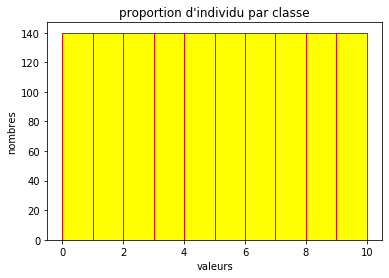

In [103]:
# Train sample
plt.hist(y_train, range = (0, 10), bins = 10, color = 'yellow',
            edgecolor = 'red')
plt.xlabel('valeurs')
plt.ylabel('nombres')
plt.title('proportion d\'individu par classe')

Text(0.5, 1.0, "proportion d'individu par classe")

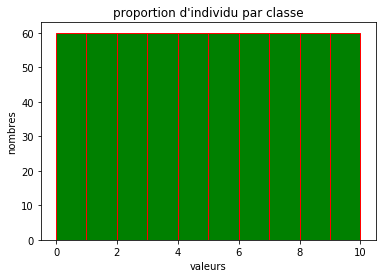

In [104]:
# Test sample
plt.hist(y_test, range = (0, 10), bins = 10, color = 'green',
            edgecolor = 'red')
plt.xlabel('valeurs')
plt.ylabel('nombres')
plt.title('proportion d\'individu par classe')

## Training K-NN model

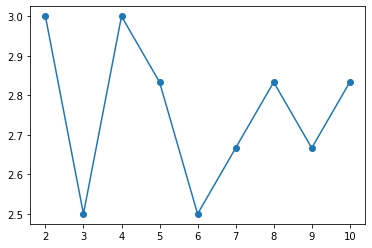

In [122]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import neighbors

errors = []
for k in range(2,11):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(X_train, y_train).score(X_test, y_test)))
plt.plot(range(2,11), errors, 'o-')
plt.show()

In [123]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

## Test of our model

In [124]:
score_train = knn.score(X_train, y_train)
score_test = knn.score(X_test, y_test)
print('Training score: %f' % score_train)
print('Test core: %f' % score_test)

Training score: 0.990714
Test core: 0.975000
